In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 2.18G/2.19G [00:36<00:00, 78.8MB/s]
100% 2.19G/2.19G [00:36<00:00, 64.3MB/s]


In [3]:
! unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [5]:
train_directory='/content/train'
test_directory='/content/test'
valid_directory='/content/validation'


In [6]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
train_data_generator=ImageDataGenerator(zoom_range=1,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.1,vertical_flip=True,fill_mode='nearest',
                                        rescale=1/255.0)
valid_data_generator=ImageDataGenerator(rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.1,vertical_flip=True,fill_mode='nearest',
                                        rescale=1/255.0)
train_data=train_data_generator.flow_from_directory(directory=train_directory,target_size=(100,100),batch_size=64,shuffle=True)
valid_data=valid_data_generator.flow_from_directory(directory=valid_directory,target_size=(100,100),batch_size=55,shuffle=True)

Found 3581 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [25]:
model=models.Sequential([
                         layers.Conv2D(128,(3,3),activation='relu',input_shape=(100,100,3)),
                         layers.MaxPool2D(3,3),

                         layers.Conv2D(128,(3,3),activation='relu'),
                         layers.MaxPool2D(3,3),


                         layers.Conv2D(128,(3,3),activation='relu'),
                         layers.MaxPool2D(3,3),

                         layers.Flatten(),
                         layers.Dense(500,activation='relu'),
                         layers.Dense(36,activation='softmax')

])

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [28]:
hist=model.fit(train_data,validation_data=valid_data,epochs=10)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
 5/56 [=>............................] - ETA: 1:56 - loss: 3.5994 - accuracy: 0.0281

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


56/56 [==============================] - 176s 3s/step - loss: 3.3708 - accuracy: 0.0737 - val_loss: 2.8998 - val_accuracy: 0.1425
Epoch 2/10
56/56 [==============================] - 172s 3s/step - loss: 2.9140 - accuracy: 0.1516 - val_loss: 2.3963 - val_accuracy: 0.2906
Epoch 3/10
56/56 [==============================] - 172s 3s/step - loss: 2.6985 - accuracy: 0.1935 - val_loss: 2.2937 - val_accuracy: 0.2650
Epoch 4/10
56/56 [==============================] - 171s 3s/step - loss: 2.6090 - accuracy: 0.2175 - val_loss: 2.1820 - val_accuracy: 0.2906
Epoch 5/10
56/56 [==============================] - 171s 3s/step - loss: 2.5369 - accuracy: 0.2251 - val_loss: 2.0518 - val_accuracy: 0.3419
Epoch 6/10
56/56 [==============================] - 171s 3s/step - loss: 2.4369 - accuracy: 0.2614 - val_loss: 1.8523 - val_accuracy: 0.4416
Epoch 7/10
56/56 [==============================] - 171s 3s/step - loss: 2.3832 - accuracy: 0.2765 - val_loss: 1.8991 - val_accuracy: 0.3761
Epoch 8/10
56/56 [======

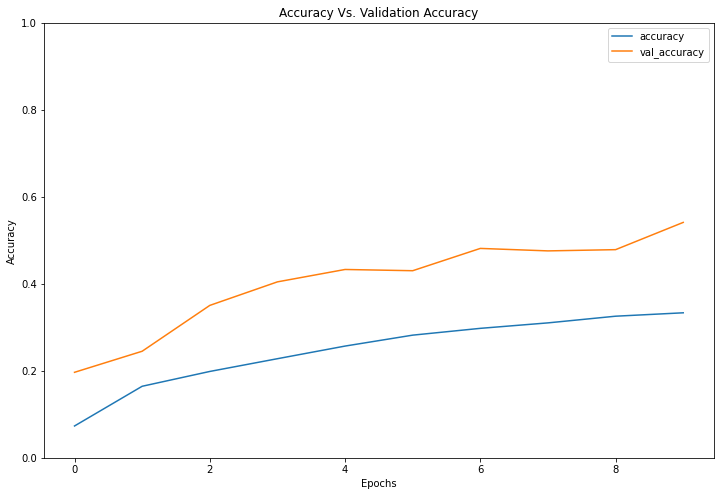

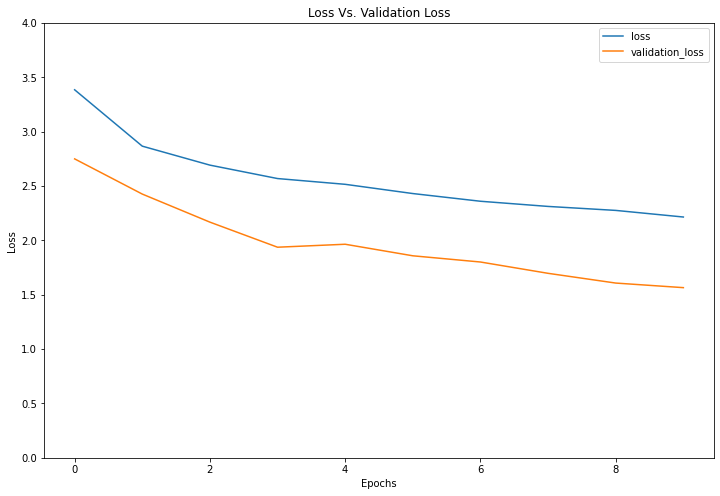

In [20]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Accuracy Vs. Validation Accuracy')
plt.ylim(0,1)
plt.show()
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Vs. Validation Loss')
plt.ylim(0,4)
plt.show()